In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [112]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [113]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [114]:
test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [115]:
train.color_type.unique()

array(['Brown Tabby', 'White', 'Brown', 'Black', 'Red', 'Tricolor',
       'Calico', 'Brown Brindle', 'Blue', 'Tortie', 'Gray', 'Fawn',
       'Buff', 'Torbie', 'Orange Tabby', 'Sable', 'Tan', 'Blue Tick',
       'Orange', 'Blue Tabby', 'Chocolate', 'Black Tabby',
       'Black Brindle', 'Cream Tabby', 'Gold', 'Calico Point',
       'Blue Merle', 'Red Merle', 'Yellow', 'Lynx Point', 'Blue Cream',
       'Flame Point', 'Cream', 'Yellow Brindle', 'Blue Tiger',
       'Seal Point', 'Red Tick', 'Brown Merle', 'Black Smoke',
       'Gray Tabby', 'Green', 'Tortie Point', 'Blue Smoke', 'Apricot',
       'Blue Point', 'Silver Tabby', 'Lilac Point', 'Silver',
       'Brown Tiger', 'Liver', 'Agouti', 'Chocolate Point', 'Liver Tick',
       'Pink', 'Black Tiger', 'Silver Lynx Point'], dtype=object)

In [116]:
train.describe()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
count,17357.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.883390,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143
std,0.770434,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000


In [117]:
train['breed_category'].value_counts()

0.0    9000
1.0    8357
2.0    1477
Name: breed_category, dtype: int64

In [118]:
train['pet_category'].value_counts()

2    10621
1     7184
4      941
0       88
Name: pet_category, dtype: int64

In [119]:
train.isna().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [120]:
test.isna().sum()

pet_id            0
issue_date        0
listing_date      0
condition       619
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
dtype: int64

In [121]:
train.dtypes

pet_id             object
issue_date         object
listing_date       object
condition         float64
color_type         object
length(m)         float64
height(cm)        float64
X1                  int64
X2                  int64
breed_category    float64
pet_category        int64
dtype: object

In [122]:
train['issue_date'] = pd.to_datetime(train['issue_date'])
train['listing_date'] = pd.to_datetime(train['listing_date'])

#train['issue_year'] = train["issue_date"].dt.year
#train['listing_year'] = train["listing_date"].dt.year

#train['issue_month'] = train["issue_date"].dt.month
#train['listing_month'] = train["listing_date"].dt.month

#train['issue_day'] = train["issue_date"].dt.day
#train['listing_day'] = train["listing_date"].dt.day

#train['issue_quarter'] = train['issue_date'].dt.quarter
#train['listing_quarter'] = train['listing_date'].dt.quarter

#train['issue_dow'] = train['issue_date'].dt.dayofweek
#train['listing_dow'] = train['listing_date'].dt.dayofweek

#train['issue_is_weekend'] = np.where(train['issue_dow'].isin([5,6]),1,0)
#train['listing_is_weekend'] = np.where(train['listing_dow'].isin([5,6]),1,0)

In [123]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [124]:
train['duration'] = (train['listing_date'] - train['issue_date']).dt.days  

In [125]:
train['listing_date'] = train['listing_date'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [126]:
train['listing_date'] = pd.to_datetime(train['listing_date'])

In [127]:
train['issue_date']=train['issue_date'].map(datetime.datetime.toordinal)
train['listing_date']=train['listing_date'].map(datetime.datetime.toordinal)

In [128]:
train.dtypes

pet_id             object
issue_date          int64
listing_date        int64
condition         float64
color_type         object
length(m)         float64
height(cm)        float64
X1                  int64
X2                  int64
breed_category    float64
pet_category        int64
duration            int64
dtype: object

In [129]:
test['issue_date'] = pd.to_datetime(test['issue_date'])
test['listing_date'] = pd.to_datetime(test['listing_date'])

#test['issue_year'] = test["issue_date"].dt.year
#test['listing_year'] = test["listing_date"].dt.year

#test['issue_month'] = test["issue_date"].dt.month
#test['listing_month'] = test["listing_date"].dt.month

#test['issue_day'] = test["issue_date"].dt.day
#test['listing_day'] = test["listing_date"].dt.day

#test['issue_quarter'] = test['issue_date'].dt.quarter
#test['listing_quarter'] = test['listing_date'].dt.quarter

#test['issue_dow'] = test['issue_date'].dt.dayofweek
#test['listing_dow'] = test['listing_date'].dt.dayofweek

#test['issue_is_weekend'] = np.where(test['issue_dow'].isin([5,6]),1,0)
#test['listing_is_weekend'] = np.where(test['listing_dow'].isin([5,6]),1,0)

In [130]:
test['duration'] = (test['listing_date'] - test['issue_date']).dt.days  

In [131]:
test['listing_date'] = test['listing_date'].apply(lambda x: x.strftime('%Y-%m-%d'))
test['listing_date'] = pd.to_datetime(test['listing_date'])

In [132]:
test['issue_date']=test['issue_date'].map(datetime.datetime.toordinal)
test['listing_date']=test['listing_date'].map(datetime.datetime.toordinal)

In [133]:
test.dtypes

pet_id           object
issue_date        int64
listing_date      int64
condition       float64
color_type       object
length(m)       float64
height(cm)      float64
X1                int64
X2                int64
duration          int64
dtype: object

In [134]:
train = train.fillna(-99)
test = test.fillna(-99)

In [135]:
#convert length(m) to length(cm)
train['length(cm)'] = train['length(m)'].apply(lambda x: x*100)
test['length(cm)'] = test['length(m)'].apply(lambda x: x*100)

In [136]:
train.drop('length(m)', axis=1, inplace=True)
test.drop('length(m)', axis=1, inplace=True)

In [137]:
train['ratio_len_height'] = round((train['length(cm)']/train['height(cm)']),2)

In [138]:
test['ratio_len_height'] = round((test['length(cm)']/test['height(cm)']),2)

In [139]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,height(cm),X1,X2,breed_category,pet_category,duration,length(cm),ratio_len_height
0,ANSL_69903,736155,736228,2.0,Brown Tabby,7.78,13,9,0.0,1,73,80.0,10.28
1,ANSL_66892,735193,737055,1.0,White,14.19,13,9,0.0,2,1862,72.0,5.07
2,ANSL_69750,735504,736256,-99.0,Brown,40.90,15,4,2.0,4,752,15.0,0.37
3,ANSL_71623,736329,737084,1.0,White,17.82,0,1,0.0,2,755,62.0,3.48
4,ANSL_57969,736600,736652,2.0,Black,11.06,18,4,0.0,1,52,50.0,4.52


In [140]:
test.head()

,pet_id,issue_date,listing_date,condition,color_type,height(cm),X1,X2,duration,length(cm),ratio_len_height
0,ANSL_75005,732175,736579,0.0,Black,42.73,0,7,4404,87.0,2.04
1,ANSL_76663,737013,737187,1.0,Orange Tabby,6.71,0,1,174,6.0,0.89
2,ANSL_58259,734787,736786,1.0,Black,41.21,0,7,1999,24.0,0.58
3,ANSL_67171,735642,736790,1.0,Black,8.46,7,1,1148,29.0,3.43
4,ANSL_72871,736347,736810,1.0,Brown,30.92,0,7,463,71.0,2.30


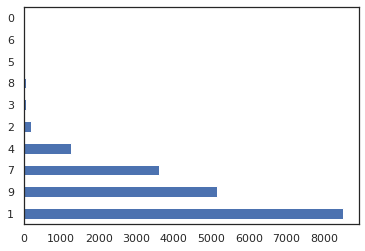

In [141]:
train['X2'].value_counts().plot(kind='barh')

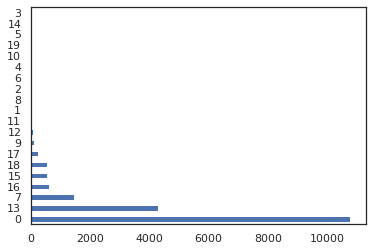

In [142]:
train['X1'].value_counts().plot(kind='barh')

In [143]:
train.groupby(['length(cm)','pet_category']).size()

length(cm)  pet_category
0.0         1                35
            2                56
            4                 2
1.0         1                65
            2                90
                           ... 
99.0        2               113
            4                13
100.0       1                41
            2                63
            4                 3
Length: 357, dtype: int64

In [144]:
# replace all 0 length with mean of lengths
val_train = train['length(cm)'].mean()
train['length(cm)'] = train['length(cm)'].replace(to_replace=0, value=val_train)
val_test = test['length(cm)'].mean()
test['length(cm)'] = test['length(cm)'].replace(to_replace=0, value=val_test)

In [145]:
train[['length(cm)','height(cm)']].describe()

,length(cm),height(cm)
count,18834.000000,18834.000000
mean,50.511761,27.448832
std,28.652550,13.019781
min,1.000000,5.000000
25%,26.000000,16.172500
50%,50.263566,27.340000
75%,76.000000,38.890000
max,100.000000,50.000000


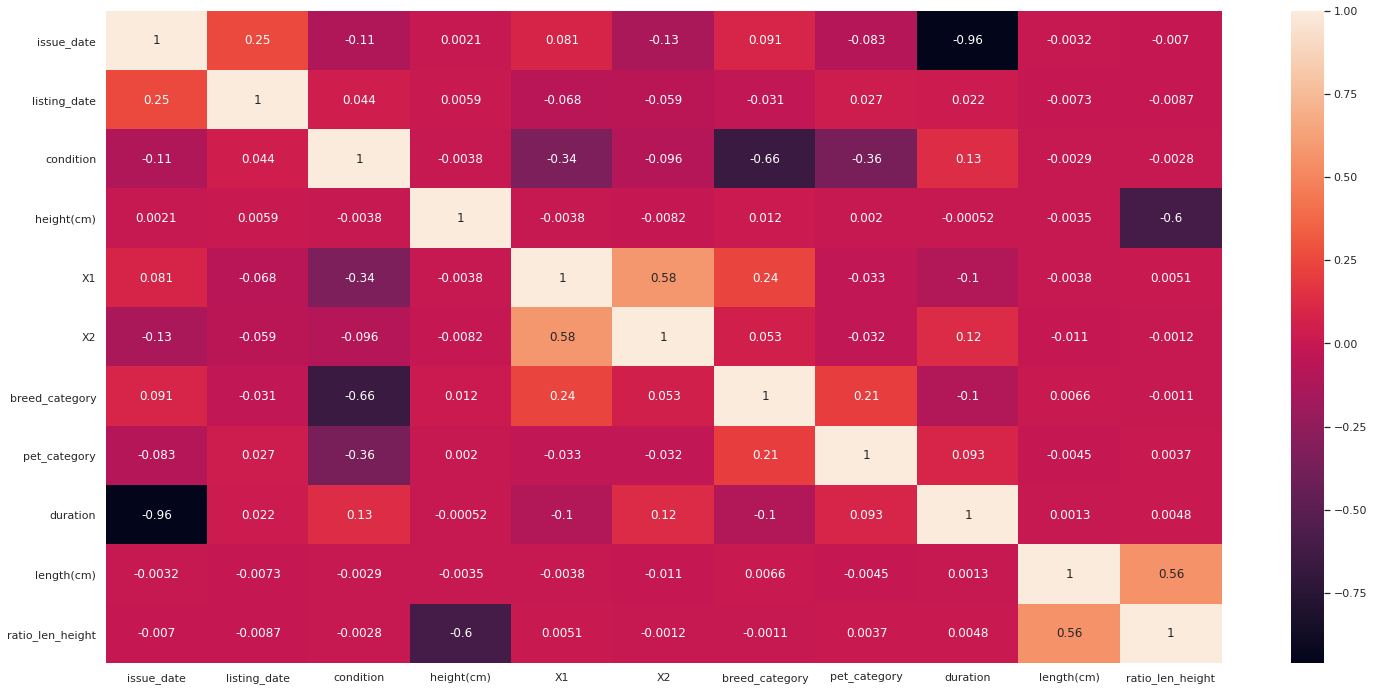

In [146]:
#correlation matrix
sns.set(style = 'white', font_scale = 1)
plt.subplots(figsize=(25,12))
sns.heatmap(train.corr(), annot= True)

In [147]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train['color_number'] = lb.fit_transform(train['color_type'])

In [148]:
test['color_number'] = lb.transform(test['color_type'])

In [149]:
test.head()

,pet_id,issue_date,listing_date,condition,color_type,height(cm),X1,X2,duration,length(cm),ratio_len_height,color_number
0,ANSL_75005,732175,736579,0.0,Black,42.73,0,7,4404,87.0,2.04,2
1,ANSL_76663,737013,737187,1.0,Orange Tabby,6.71,0,1,174,6.0,0.89,38
2,ANSL_58259,734787,736786,1.0,Black,41.21,0,7,1999,24.0,0.58,2
3,ANSL_67171,735642,736790,1.0,Black,8.46,7,1,1148,29.0,3.43,2
4,ANSL_72871,736347,736810,1.0,Brown,30.92,0,7,463,71.0,2.30,15


In [150]:
train = train.drop(columns='color_type')

In [151]:
test = test.drop(columns='color_type')

In [152]:
train.columns

Index(['pet_id', 'issue_date', 'listing_date', 'condition', 'height(cm)', 'X1',
       'X2', 'breed_category', 'pet_category', 'duration', 'length(cm)',
       'ratio_len_height', 'color_number'],
      dtype='object')

In [153]:
train = train[['pet_id', 'issue_date', 'listing_date', 'condition', 'height(cm)', 'X1',
               'X2', 'duration', 'length(cm)',
               'ratio_len_height', 'color_number', 'breed_category', 'pet_category']]

In [154]:
test.columns

Index(['pet_id', 'issue_date', 'listing_date', 'condition', 'height(cm)', 'X1',
       'X2', 'duration', 'length(cm)', 'ratio_len_height', 'color_number'],
      dtype='object')

In [155]:
# Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
array = train.copy().values
X = array[:,1:10]
Y = array[:,11]
Y=Y.astype('int')
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.03947215 0.03553142 0.7462937  0.03498708 0.02149052 0.01570525
 0.03695424 0.03523555 0.03433008]


In [156]:
X = array[:,1:11]
Y = array[:,12]
Y=Y.astype('int')
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.09853219 0.07835323 0.09029063 0.06474499 0.11983254 0.07889915
 0.13994235 0.06240889 0.06311365 0.20388238]


In [157]:
a = set(train.columns)-set(test.columns)
a

{'breed_category', 'pet_category'}

## Modeling

In [158]:
target = train[['breed_category','pet_category']]
target_breed = target['breed_category']
target_pet = target['pet_category']

In [159]:
train = train.drop(columns=['breed_category','pet_category'])

In [160]:
train.head()

,pet_id,issue_date,listing_date,condition,height(cm),X1,X2,duration,length(cm),ratio_len_height,color_number
0,ANSL_69903,736155,736228,2.0,7.78,13,9,73,80.0,10.28,18
1,ANSL_66892,735193,737055,1.0,14.19,13,9,1862,72.0,5.07,53
2,ANSL_69750,735504,736256,-99.0,40.90,15,4,752,15.0,0.37,15
3,ANSL_71623,736329,737084,1.0,17.82,0,1,755,62.0,3.48,53
4,ANSL_57969,736600,736652,2.0,11.06,18,4,52,50.0,4.52,2


In [161]:
df = train.drop(columns='pet_id')

In [162]:
df.head()

,issue_date,listing_date,condition,height(cm),X1,X2,duration,length(cm),ratio_len_height,color_number
0,736155,736228,2.0,7.78,13,9,73,80.0,10.28,18
1,735193,737055,1.0,14.19,13,9,1862,72.0,5.07,53
2,735504,736256,-99.0,40.90,15,4,752,15.0,0.37,15
3,736329,737084,1.0,17.82,0,1,755,62.0,3.48,53
4,736600,736652,2.0,11.06,18,4,52,50.0,4.52,2


In [163]:
df_2 = df.copy()
df_2['breed_category'] = target['breed_category']

In [164]:
df_2.head()

,issue_date,listing_date,condition,height(cm),X1,X2,duration,length(cm),ratio_len_height,color_number,breed_category
0,736155,736228,2.0,7.78,13,9,73,80.0,10.28,18,0.0
1,735193,737055,1.0,14.19,13,9,1862,72.0,5.07,53,0.0
2,735504,736256,-99.0,40.90,15,4,752,15.0,0.37,15,2.0
3,736329,737084,1.0,17.82,0,1,755,62.0,3.48,53,0.0
4,736600,736652,2.0,11.06,18,4,52,50.0,4.52,2,0.0


In [165]:
df.head()

,issue_date,listing_date,condition,height(cm),X1,X2,duration,length(cm),ratio_len_height,color_number
0,736155,736228,2.0,7.78,13,9,73,80.0,10.28,18
1,735193,737055,1.0,14.19,13,9,1862,72.0,5.07,53
2,735504,736256,-99.0,40.90,15,4,752,15.0,0.37,15
3,736329,737084,1.0,17.82,0,1,755,62.0,3.48,53
4,736600,736652,2.0,11.06,18,4,52,50.0,4.52,2


In [166]:
from sklearn.model_selection import train_test_split
X_train_breed, X_var_breed, y_train_breed, y_var_breed = train_test_split(df, target_breed, test_size = 0.2, random_state = 0)

In [167]:
print("X_train Shape:", X_train_breed.shape)
print("X_var Shape:", X_var_breed.shape)
print("y_train Shape:", y_train_breed.shape)
print("y_var Shape:", y_var_breed.shape)

X_train Shape: (15067, 10)
X_var Shape: (3767, 10)
y_train Shape: (15067,)
y_var Shape: (3767,)


### Random Forest

In [168]:
from sklearn.ensemble import RandomForestClassifier
classifier_breed = RandomForestClassifier(criterion = 'entropy', min_samples_split=4)
classifier_breed.fit(X_train_breed, y_train_breed)

y_pred_breed = classifier_breed.predict(X_var_breed)
acc = accuracy_score(y_var_breed, y_pred_breed)
prec = precision_score(y_var_breed, y_pred_breed, average='weighted')
rec = recall_score(y_var_breed, y_pred_breed, average='weighted')
f1 = f1_score(y_var_breed, y_pred_breed, average='weighted')

model_results_rf = pd.DataFrame([['Random Forest (n = 100) on Breed', acc, prec, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results_rf

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest (n = 100) on Breed,0.90523,0.905561,0.90523,0.905154


In [169]:
X_train_pet, X_var_pet, y_train_pet, y_var_pet = train_test_split(df_2, target_pet, test_size = 0.2, random_state = 0)

In [170]:
print("X_train Shape:", X_train_pet.shape)
print("X_var Shape:", X_var_pet.shape)
print("y_train Shape:", y_train_pet.shape)
print("y_var Shape:", y_var_pet.shape)

X_train Shape: (15067, 11)
X_var Shape: (3767, 11)
y_train Shape: (15067,)
y_var Shape: (3767,)


In [171]:
classifier_pet = RandomForestClassifier(criterion = 'entropy')
classifier_pet.fit(X_train_pet, y_train_pet)

y_pred_pet = classifier_pet.predict(X_var_pet)
acc = accuracy_score(y_var_pet, y_pred_pet)
prec = precision_score(y_var_pet, y_pred_pet, average='weighted')
rec = recall_score(y_var_pet, y_pred_pet, average='weighted')
f1 = f1_score(y_var_pet, y_pred_pet, average='weighted')

model_results_rf_pet = pd.DataFrame([['Random Forest (n = 100) on pet', acc, prec, rec, f1]],
                      columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results_rf = model_results_rf.append(model_results_rf_pet, ignore_index = True)
model_results_rf

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest (n = 100) on Breed,0.905230,0.905561,0.905230,0.905154
1,Random Forest (n = 100) on pet,0.889302,0.890024,0.889302,0.888225


### XGBoost

In [172]:
from xgboost import XGBClassifier
classifier_breed = XGBClassifier()
classifier_breed.fit(X_train_breed, y_train_breed)

y_pred_breed = classifier_breed.predict(X_var_breed)
acc = accuracy_score(y_var_breed, y_pred_breed)
prec = precision_score(y_var_breed, y_pred_breed, average='weighted')
rec = recall_score(y_var_breed, y_pred_breed, average='weighted')
f1 = f1_score(y_var_breed, y_pred_breed, average='weighted')

model_results_xgb = pd.DataFrame([['XGBoost on Breed', acc, prec, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

classifier_pet = XGBClassifier()
classifier_pet.fit(X_train_pet, y_train_pet)

y_pred_pet = classifier_pet.predict(X_var_pet)
acc = accuracy_score(y_var_pet, y_pred_pet)
prec = precision_score(y_var_pet, y_pred_pet, average='weighted')
rec = recall_score(y_var_pet, y_pred_pet, average='weighted')
f1 = f1_score(y_var_pet, y_pred_pet, average='weighted')

model_results_xgb_pet = pd.DataFrame([['XGBoost on pet', acc, prec, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results_xgb = model_results_xgb.append(model_results_xgb_pet, ignore_index = True)
model_results_xgb

,Model,Accuracy,Precision,Recall,F1 Score
0,XGBoost on Breed,0.910804,0.912096,0.910804,0.910635
1,XGBoost on pet,0.891956,0.893347,0.891956,0.890745


In [173]:
classifier_breed = XGBClassifier()
classifier_breed.fit(X_train_breed, y_train_breed)

y_pred_breed = classifier_breed.predict(X_var_breed)
acc = accuracy_score(y_var_breed, y_pred_breed)
prec = precision_score(y_var_breed, y_pred_breed, average='weighted')
rec = recall_score(y_var_breed, y_pred_breed, average='weighted')
f1 = f1_score(y_var_breed, y_pred_breed, average='weighted')

model_results_xgb = pd.DataFrame([['XGBoost on Breed', acc, prec, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results_xgb

,Model,Accuracy,Precision,Recall,F1 Score
0,XGBoost on Breed,0.910804,0.912096,0.910804,0.910635


### CatBoost

In [174]:
pip install catboost

In [175]:
from catboost import CatBoostClassifier
classifier_breed = CatBoostClassifier(learning_rate=0.03)
classifier_breed.fit(X_train_breed, y_train_breed)

y_pred_breed = classifier_breed.predict(X_var_breed)
acc = accuracy_score(y_var_breed, y_pred_breed)
prec = precision_score(y_var_breed, y_pred_breed, average='weighted')
rec = recall_score(y_var_breed, y_pred_breed, average='weighted')
f1 = f1_score(y_var_breed, y_pred_breed, average='weighted')

model_results_catb = pd.DataFrame([['CatBoost on Breed', acc, prec, rec, f1]],
                                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

classifier_pet = CatBoostClassifier(learning_rate=0.03)
classifier_pet.fit(X_train_pet, y_train_pet)
y_pred_pet = classifier_pet.predict(X_var_pet)
acc = accuracy_score(y_var_pet, y_pred_pet)
prec = precision_score(y_var_pet, y_pred_pet, average='weighted')
rec = recall_score(y_var_pet, y_pred_pet, average='weighted')
f1 = f1_score(y_var_pet, y_pred_pet, average='weighted')

model_results_catb_pet = pd.DataFrame([['Catboost on pet', acc, prec, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results_catb = model_results_catb.append(model_results_catb_pet, ignore_index = True)
model_results_catb

0:	learn: 1.0498979	total: 11.4ms	remaining: 11.4s
1:	learn: 1.0057282	total: 24.4ms	remaining: 12.2s
2:	learn: 0.9647270	total: 36.9ms	remaining: 12.3s
3:	learn: 0.9268340	total: 49.2ms	remaining: 12.2s
4:	learn: 0.8912563	total: 57.7ms	remaining: 11.5s
5:	learn: 0.8584626	total: 69.8ms	remaining: 11.6s
6:	learn: 0.8276709	total: 82ms	remaining: 11.6s
7:	learn: 0.7988499	total: 94ms	remaining: 11.7s
8:	learn: 0.7718087	total: 106ms	remaining: 11.7s
9:	learn: 0.7462601	total: 118ms	remaining: 11.7s
10:	learn: 0.7221125	total: 131ms	remaining: 11.7s
11:	learn: 0.6993547	total: 143ms	remaining: 11.7s
12:	learn: 0.6776534	total: 151ms	remaining: 11.5s
13:	learn: 0.6573852	total: 164ms	remaining: 11.5s
14:	learn: 0.6379367	total: 182ms	remaining: 12s
15:	learn: 0.6195503	total: 194ms	remaining: 12s
16:	learn: 0.6021356	total: 206ms	remaining: 11.9s
17:	learn: 0.5855534	total: 222ms	remaining: 12.1s
18:	learn: 0.5697372	total: 235ms	remaining: 12.1s
19:	learn: 0.5545384	total: 247ms	remaini

,Model,Accuracy,Precision,Recall,F1 Score
0,CatBoost on Breed,0.90815,0.908380,0.90815,0.908091
1,Catboost on pet,0.90284,0.903585,0.90284,0.901646


In [176]:
model_results_xgb

,Model,Accuracy,Precision,Recall,F1 Score
0,XGBoost on Breed,0.910804,0.912096,0.910804,0.910635


### Light Boost

In [ ]:
from lightgbm import LGBMClassifier
classifier_breed = LGBMClassifier(num_leaves=32, subsample=0.25)
classifier_breed.fit(X_train_breed, y_train_breed)

y_pred_breed = classifier_breed.predict(X_var_breed)
acc = accuracy_score(y_var_breed, y_pred_breed)
prec = precision_score(y_var_breed, y_pred_breed, average='weighted')
rec = recall_score(y_var_breed, y_pred_breed, average='weighted')
f1 = f1_score(y_var_breed, y_pred_breed, average='weighted')

model_results_lgb = pd.DataFrame([['Lgb on Breed', acc, prec, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

classifier_pet = LGBMClassifier()
classifier_pet.fit(X_train_pet, y_train_pet)
y_pred_pet = classifier_pet.predict(X_var_pet)
acc = accuracy_score(y_var_pet, y_pred_pet)
prec = precision_score(y_var_pet, y_pred_pet, average='weighted')
rec = recall_score(y_var_pet, y_pred_pet, average='weighted')
f1 = f1_score(y_var_pet, y_pred_pet, average='weighted')

model_results_lgb_pet = pd.DataFrame([['lgb on pet', acc, prec, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results_lgb= model_results_lgb.append(model_results_lgb_pet, ignore_index = True)
model_results_lgb

In [ ]:
all_models = pd.DataFrame()
all_models = all_models.append(model_results_rf, ignore_index = True)
all_models = all_models.append(model_results_xgb, ignore_index = True)
all_models = all_models.append(model_results_catb, ignore_index = True)
all_models = all_models.append(model_results_lgb, ignore_index = True)
all_models 

In [ ]:
all_models = pd.DataFrame()
all_models = all_models.append(model_results_rf, ignore_index = True)
all_models = all_models.append(model_results_xgb, ignore_index = True)
all_models = all_models.append(model_results_catb, ignore_index = True)
all_models = all_models.append(model_results_lgb, ignore_index = True)
all_models 

In [ ]:
def LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000,
                   objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0,
                   subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=-1, silent=True, 
                   importance_type='split', **kwargs)

In [ ]:
params = {
    "learning_rate": [0.10],
    "max_depth"    : [None],
    "min_child_samples" : [20],
    "subsample" : [0.25],
    "num_leaves": [4, 8, 12, 16, 20, 24, 28, 32, 36]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
import time
grid_search = GridSearchCV(estimator = classifier_pet,
                           param_grid = params,
                           scoring = "accuracy",
                           cv = 10,
                           verbose=1,
                           n_jobs=-1
                           )
t0 = time.time()
grid_search = grid_search.fit(X_train_pet, y_train_pet)
t1 = time.time()
print("Runtime: %0.2f seconds" % (t1 - t0))


grid_search.best_params_

In [ ]:
grid_search.best_score_

### Stack


In [ ]:
classifier_breed = XGBClassifier()
classifier_breed.fit(X_train_breed, y_train_breed)

y_pred_breed = classifier_breed.predict(X_var_breed)
acc = accuracy_score(y_var_breed, y_pred_breed)
prec = precision_score(y_var_breed, y_pred_breed, average='weighted')
rec = recall_score(y_var_breed, y_pred_breed, average='weighted')
f1 = f1_score(y_var_breed, y_pred_breed, average='weighted')

model_results_stack = pd.DataFrame([['XGBoost on Breed', acc, prec, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

classifier_pet = CatBoostClassifier(learning_rate=0.03)
classifier_pet.fit(X_train_pet, y_train_pet)
y_pred_pet = classifier_pet.predict(X_var_pet)
acc = accuracy_score(y_var_pet, y_pred_pet)
prec = precision_score(y_var_pet, y_pred_pet, average='weighted')
rec = recall_score(y_var_pet, y_pred_pet, average='weighted')
f1 = f1_score(y_var_pet, y_pred_pet, average='weighted')

model_results_catb_pet = pd.DataFrame([['Catboost on pet', acc, prec, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results_stack= model_results_stack.append(model_results_catb_pet, ignore_index = True)
model_results_stack

### Stack (XGbBoost and LGBoost)

In [ ]:
classifier_breed = XGBClassifier()
classifier_breed.fit(X_train_breed, y_train_breed)

y_pred_breed = classifier_breed.predict(X_var_breed)
acc = accuracy_score(y_var_breed, y_pred_breed)
prec = precision_score(y_var_breed, y_pred_breed, average='weighted')
rec = recall_score(y_var_breed, y_pred_breed, average='weighted')
f1 = f1_score(y_var_breed, y_pred_breed, average='weighted')

model_results_stack_2 = pd.DataFrame([['XGBoost on Breed', acc, prec, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

classifier_pet = LGBMClassifier()
classifier_pet.fit(X_train_pet, y_train_pet)
y_pred_pet = classifier_pet.predict(X_var_pet)
acc = accuracy_score(y_var_pet, y_pred_pet)
prec = precision_score(y_var_pet, y_pred_pet, average='weighted')
rec = recall_score(y_var_pet, y_pred_pet, average='weighted')
f1 = f1_score(y_var_pet, y_pred_pet, average='weighted')

model_results_lgb_pet = pd.DataFrame([['lgb on pet', acc, prec, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results_stack_2= model_results_stack_2.append(model_results_lgb_pet, ignore_index = True)
model_results_stack_2

## ON Test

In [ ]:
#test_df = test.drop(columns=['pet_id', 'breed_category', 'pet_category'])

In [ ]:
test.head()

In [ ]:
test_df = test.drop(columns='pet_id')

In [ ]:
#test_df = test_df[['issue_date', 'listing_date', 'condition', 'color_number', 'height(cm)', 'X1', 'X2', 'duration', 'length(cm)', 'ratio_len_height']]

In [ ]:
sc_X = StandardScaler()
X_test2 = pd.DataFrame(sc_X.fit_transform(test_df))

X_test2.columns = test_df.columns.values

X_test2.index = test_df.index.values

test_df = X_test2


In [ ]:
test_df.head()

In [ ]:
test_pred_breed = classifier_breed.predict(test_df)

In [ ]:
len(test_pred_breed)

In [ ]:
test_df_pet = test_df.copy()
test_df_pet['breed_category'] = test_pred_breed

In [ ]:
test_pred_pet = classifier_pet.predict(test_df_pet)

In [ ]:
len(test_pred_pet)

In [ ]:
test_df_pet['pet_category'] = test_pred_pet

In [ ]:
test_df.head()

In [ ]:
print(test_df_pet['breed_category'].value_counts())
print('*'*30)
print(test_df_pet['pet_category'].value_counts())

In [ ]:
final_sub = pd.DataFrame()
final_sub['pet_id'] = test['pet_id']
final_sub['breed_category'] = test_df_pet['breed_category']
final_sub['pet_category'] = test_df_pet['pet_category']

In [ ]:
final_sub.head()

In [ ]:
final_sub.to_csv('/content/stack(xgb&lgb).csv', index=False)